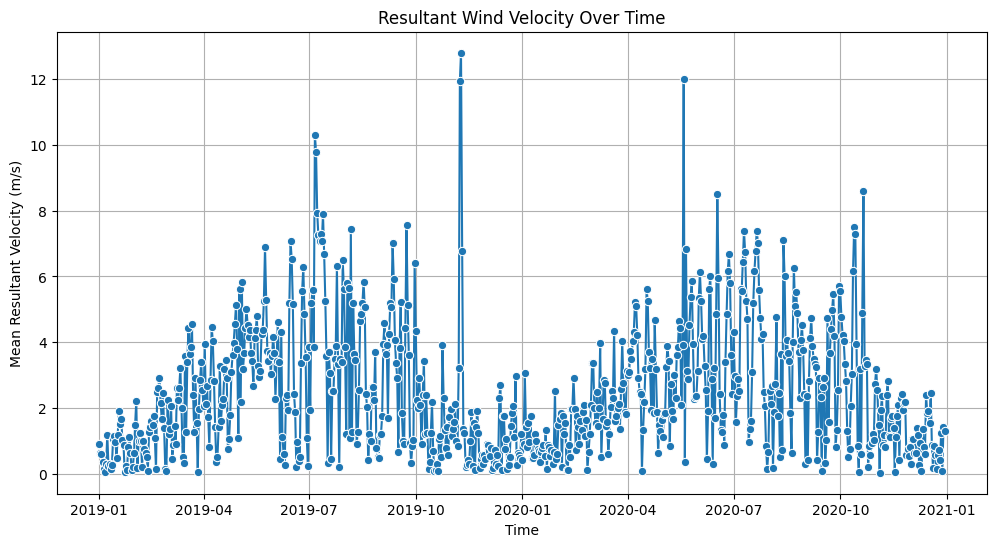

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'WindSpeed.csv' 
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='system:time_start', y='ResultantVelocity', marker='o')
plt.title('Resultant Wind Velocity Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Resultant Velocity (m/s)')
plt.grid(True)
plt.show()


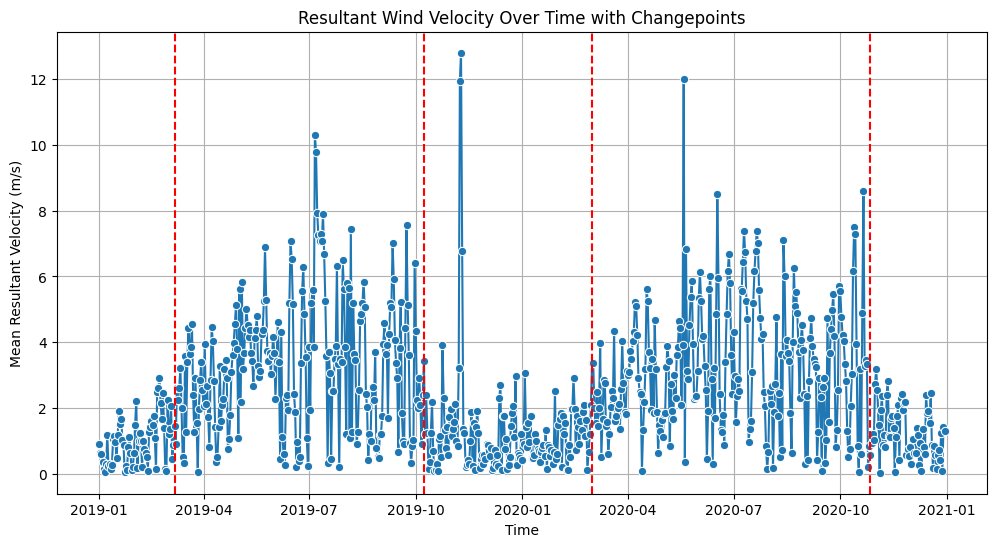

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

file_path = 'WindSpeed.csv' 
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.sort_values('system:time_start', inplace=True)

time_series = data['ResultantVelocity'].values

model = rpt.Pelt(model="rbf").fit(time_series)
breakpoints = model.predict(pen=10) 

plt.figure(figsize=(12, 6))
sns.lineplot(x=data['system:time_start'], y=time_series, marker='o')
for breakpoint in breakpoints:
    if breakpoint < len(data):
        plt.axvline(x=data['system:time_start'].iloc[breakpoint], color='r', linestyle='--')

plt.title('Resultant Wind Velocity Over Time with Changepoints')
plt.xlabel('Time')
plt.ylabel('Mean Resultant Velocity (m/s)')
plt.grid(True)
plt.show()

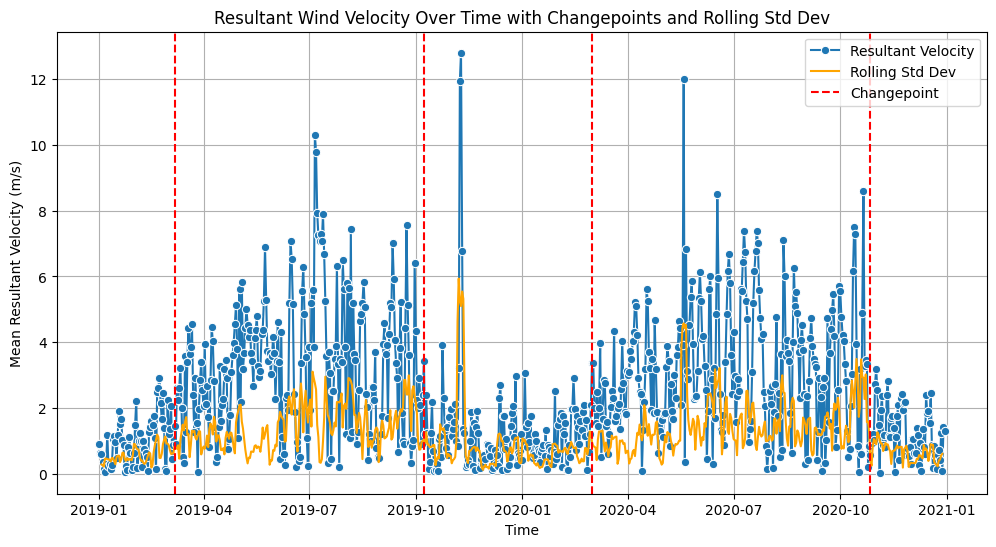

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

# Load the data
file_path = 'WindSpeed.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Convert the 'system:time_start' column to datetime
data['system:time_start'] = pd.to_datetime(data['system:time_start'])

# Sort the data by time
data.sort_values('system:time_start', inplace=True)

# Extract the time series data
time_series = data['ResultantVelocity'].values

# Perform robust changepoint detection using the Pelt algorithm with 'rbf' model
model = rpt.Pelt(model="rbf").fit(time_series)
breakpoints = model.predict(pen=10)  # Penalty term for the number of changepoints

# Calculate the rolling standard deviation
rolling_std = data['ResultantVelocity'].rolling(window=5,center=True).std()  # Adjust window size as needed

# Plot the data and the changepoints
plt.figure(figsize=(12, 6))
sns.lineplot(x=data['system:time_start'], y=time_series, marker='o', label='Resultant Velocity')
sns.lineplot(x=data['system:time_start'], y=rolling_std, color='orange', label='Rolling Std Dev')

for breakpoint in breakpoints:
    if breakpoint < len(data):
        plt.axvline(x=data['system:time_start'].iloc[breakpoint], color='r', linestyle='--', label='Changepoint' if breakpoint == breakpoints[0] else "")

plt.title('Resultant Wind Velocity Over Time with Changepoints and Rolling Std Dev')
plt.xlabel('Time')
plt.ylabel('Mean Resultant Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()


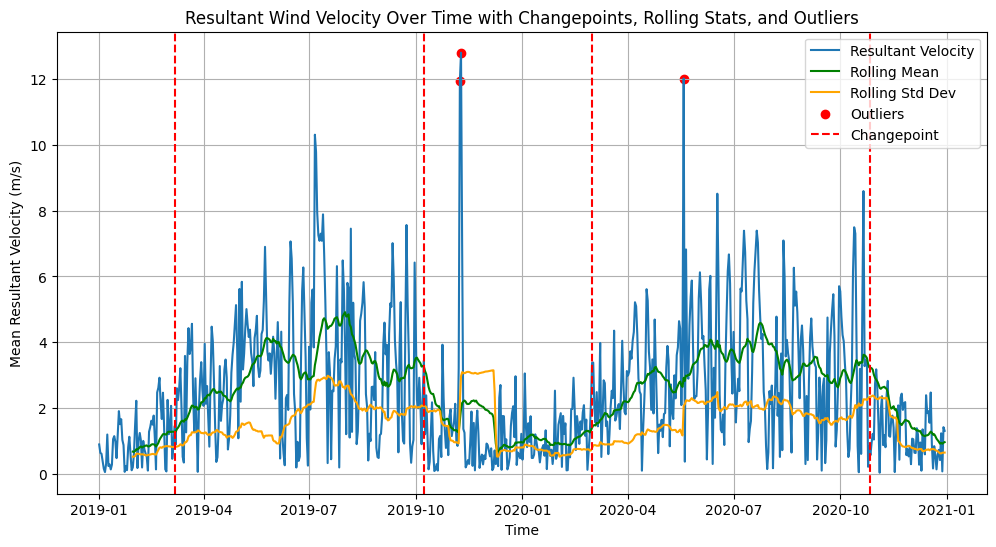

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

file_path = 'WindSpeed.csv' 
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.sort_values('system:time_start', inplace=True)

time_series = data['ResultantVelocity'].values

model = rpt.Pelt(model="rbf").fit(time_series)
breakpoints = model.predict(pen=10)  

window_size = 30  
rolling_mean = data['ResultantVelocity'].rolling(window=window_size).mean()
rolling_std = data['ResultantVelocity'].rolling(window=window_size).std()

threshold = 3.5
outliers = (data['ResultantVelocity'] > rolling_mean + threshold * rolling_std) | \
           (data['ResultantVelocity'] < rolling_mean - threshold * rolling_std)

plt.figure(figsize=(12, 6))
sns.lineplot(x=data['system:time_start'], y=time_series, label='Resultant Velocity')
sns.lineplot(x=data['system:time_start'], y=rolling_mean, color='green', label='Rolling Mean')
sns.lineplot(x=data['system:time_start'], y=rolling_std, color='orange', label='Rolling Std Dev')
plt.scatter(data['system:time_start'][outliers], data['ResultantVelocity'][outliers], color='red', label='Outliers')

for breakpoint in breakpoints:
    if breakpoint < len(data):
        plt.axvline(x=data['system:time_start'].iloc[breakpoint], color='r', linestyle='--', label='Changepoint' if breakpoint == breakpoints[0] else "")

plt.title('Resultant Wind Velocity Over Time with Changepoints, Rolling Stats, and Outliers')
plt.xlabel('Time')
plt.ylabel('Mean Resultant Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()


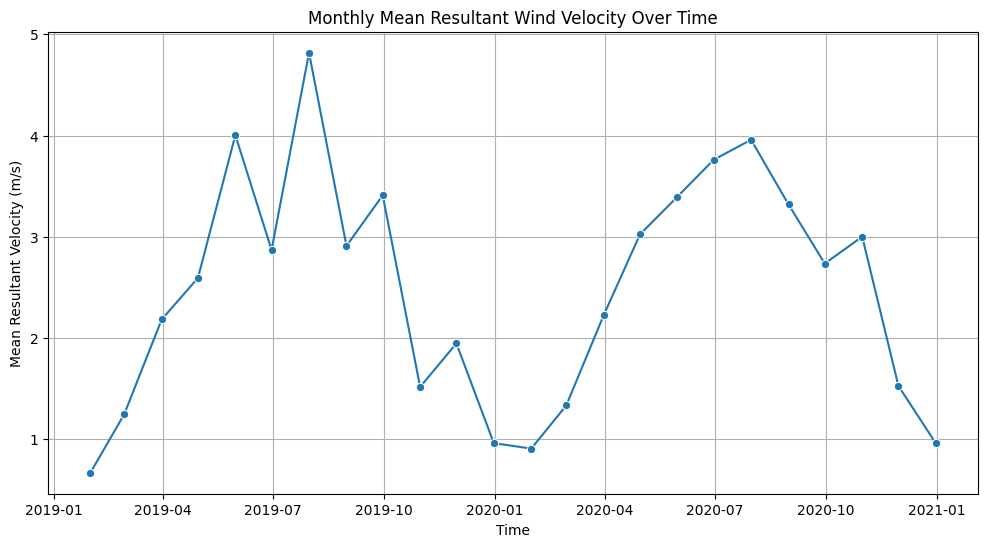

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'WindSpeed.csv'  
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data.resample('ME').mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x=monthly_data.index, y='ResultantVelocity', marker='o')
plt.title('Monthly Mean Resultant Wind Velocity Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Resultant Velocity (m/s)')
plt.grid(True)
plt.show()
modified_csv_file_path = 'modified_Windspeed.csv'
monthly_data.to_csv(modified_csv_file_path)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_14036\794126136.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = data.resample('M').mean()
C:\Users\Ayush\AppData\Local\Temp\ipykernel_14036\794126136.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = data.resample('M').max()
C:\Users\Ayush\AppData\Local\Temp\ipykernel_14036\794126136.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_95th = data.resample('M').quantile(0.95)


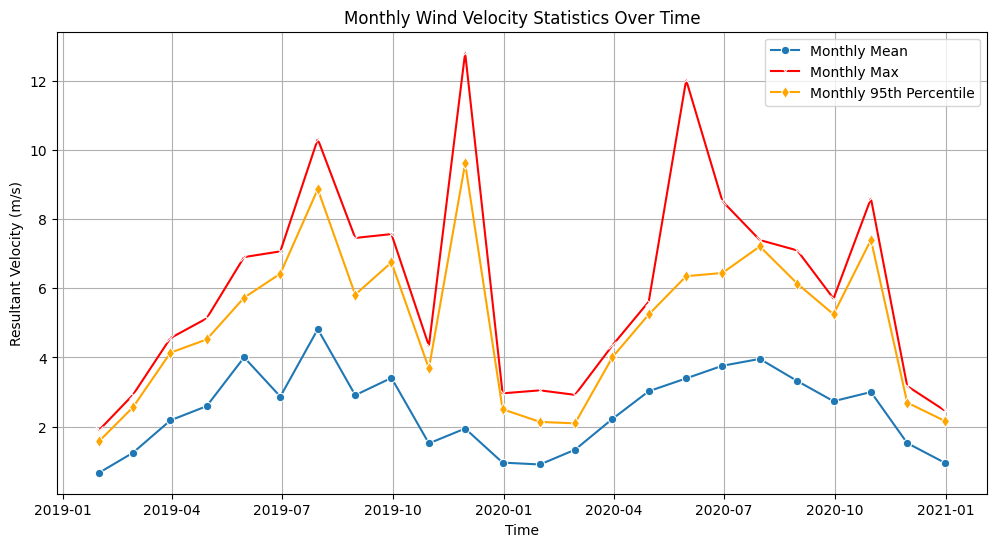

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'WindSpeed.csv'  
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_mean = data.resample('M').mean()
monthly_max = data.resample('M').max()
monthly_95th = data.resample('M').quantile(0.95)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_mean, x=monthly_mean.index, y='ResultantVelocity', marker='o', label='Monthly Mean')
sns.lineplot(data=monthly_max, x=monthly_max.index, y='ResultantVelocity', marker='x', label='Monthly Max', color='red')
sns.lineplot(data=monthly_95th, x=monthly_95th.index, y='ResultantVelocity', marker='d', label='Monthly 95th Percentile', color='orange')

plt.title('Monthly Wind Velocity Statistics Over Time')
plt.xlabel('Time')
plt.ylabel('Resultant Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()


Changepoints detected at:
2019-03-07 00:00:00 with wind speed 1.445
2019-10-08 00:00:00 with wind speed 3.439
2020-03-01 00:00:00 with wind speed 3.376
2020-10-27 00:00:00 with wind speed 0.561

Outliers detected at:
2019-11-08 00:00:00 with wind speed 11.934
2019-11-09 00:00:00 with wind speed 12.806
2020-05-19 00:00:00 with wind speed 12.02


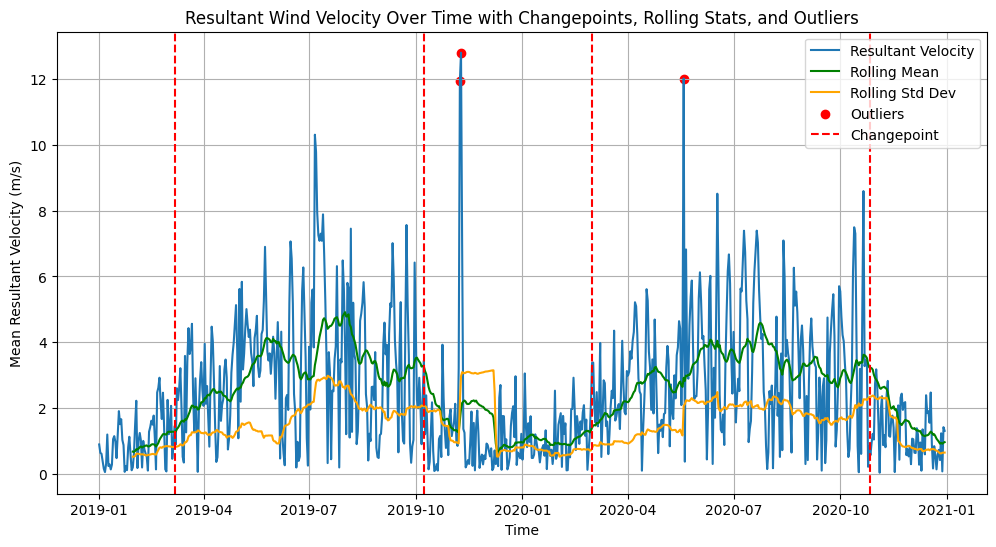

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

file_path = 'WindSpeed.csv'  
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.sort_values('system:time_start', inplace=True)

time_series = data['ResultantVelocity'].values

model = rpt.Pelt(model="rbf").fit(time_series)
breakpoints = model.predict(pen=10)  

print("Changepoints detected at:")
for breakpoint in breakpoints[:-1]:  
    print(data['system:time_start'].iloc[breakpoint], "with wind speed", data['ResultantVelocity'].iloc[breakpoint])

window_size = 30 
rolling_mean = data['ResultantVelocity'].rolling(window=window_size).mean()
rolling_std = data['ResultantVelocity'].rolling(window=window_size).std()

threshold = 3.5
outliers = (data['ResultantVelocity'] > rolling_mean + threshold * rolling_std) | \
           (data['ResultantVelocity'] < rolling_mean - threshold * rolling_std)

print("\nOutliers detected at:")
for index, is_outlier in outliers.items():
    if is_outlier:
        print(data['system:time_start'].iloc[index], "with wind speed", data['ResultantVelocity'].iloc[index])

plt.figure(figsize=(12, 6))
sns.lineplot(x=data['system:time_start'], y=time_series, label='Resultant Velocity')
sns.lineplot(x=data['system:time_start'], y=rolling_mean, color='green', label='Rolling Mean')
sns.lineplot(x=data['system:time_start'], y=rolling_std, color='orange', label='Rolling Std Dev')
plt.scatter(data['system:time_start'][outliers], data['ResultantVelocity'][outliers], color='red', label='Outliers')

for breakpoint in breakpoints[:-1]: 
    plt.axvline(x=data['system:time_start'].iloc[breakpoint], color='r', linestyle='--', label='Changepoint' if breakpoint == breakpoints[0] else "")

plt.title('Resultant Wind Velocity Over Time with Changepoints, Rolling Stats, and Outliers')
plt.xlabel('Time')
plt.ylabel('Mean Resultant Velocity (m/s)')
plt.legend()
plt.grid(True)
plt.show()
